In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
trainData = pd.read_csv('drive/My Drive/Flipr 6.0/Train_dataset.csv')

In [5]:
trainData.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,"1,24,42,373","1,19,78,450",878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
1,Delhi,Delhi,M.C,"1,10,07,835","98,79,172",858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
2,Bangalore,Karnataka,MPUA,"84,36,675","43,01,326",936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000.0
3,Hyderabad,Telangana,MPUA,"68,09,970","36,37,483",930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123.0
4,Ahmedabad,Gujarat,MPUA,"55,70,585","35,20,085",852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204.0


In [6]:
trainData.dropna(subset=['City', 'State','SWM'], how='any', inplace=True)
trainData.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]     491
Sex Ratio              8
Median Age            17
Avg Temp              16
SWM                    0
Toilets Avl           22
Water Purity         155
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [7]:
trainData.fillna(0, inplace=True)

In [8]:
trainData.isnull().sum()

City                 0
State                0
Type                 0
Population [2011]    0
Popuation [2001]     0
Sex Ratio            0
Median Age           0
Avg Temp             0
SWM                  0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
Covid Cases          0
dtype: int64

In [9]:
#trainData.drop(['Population [2011]', 'Popuation [2001]'], axis = 1, inplace = True)
trainData

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,"1,24,42,373","1,19,78,450",878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
1,Delhi,Delhi,M.C,"1,10,07,835","98,79,172",858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
2,Bangalore,Karnataka,MPUA,"84,36,675","43,01,326",936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000.0
3,Hyderabad,Telangana,MPUA,"68,09,970","36,37,483",930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123.0
4,Ahmedabad,Gujarat,MPUA,"55,70,585","35,20,085",852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,Lunawada,Gujarat,M,"36,954",0,846.0,23.0,28.0,MEDIUM,68.0,103.0,0.035280,31263.0,19.0,284973.0,1944.0
783,Murshidabad,West Bengal,M,"36,947",0,945.0,23.0,36.0,MEDIUM,62.0,136.0,0.056394,34915.0,22.0,1489500.0,2172.0
784,Mahe,Puducherry,M,"36,828",0,1019.0,28.0,28.0,HIGH,98.0,138.0,0.066752,37528.0,27.0,106153.0,2851.0
785,Lanka,Assam,M.B,"36,805",0,900.0,24.0,6.0,MEDIUM,63.0,145.0,0.627556,33125.0,15.0,24720.0,2158.0


Covid Cases          1.000000
Female Population    0.790443
Toilets Avl          0.401901
# of hospitals       0.387026
Foreign Visitors     0.152967
Water Purity         0.087789
H Index              0.047246
Avg Temp             0.029560
Sex Ratio            0.013984
Median Age          -0.146246
Name: Covid Cases, dtype: float64

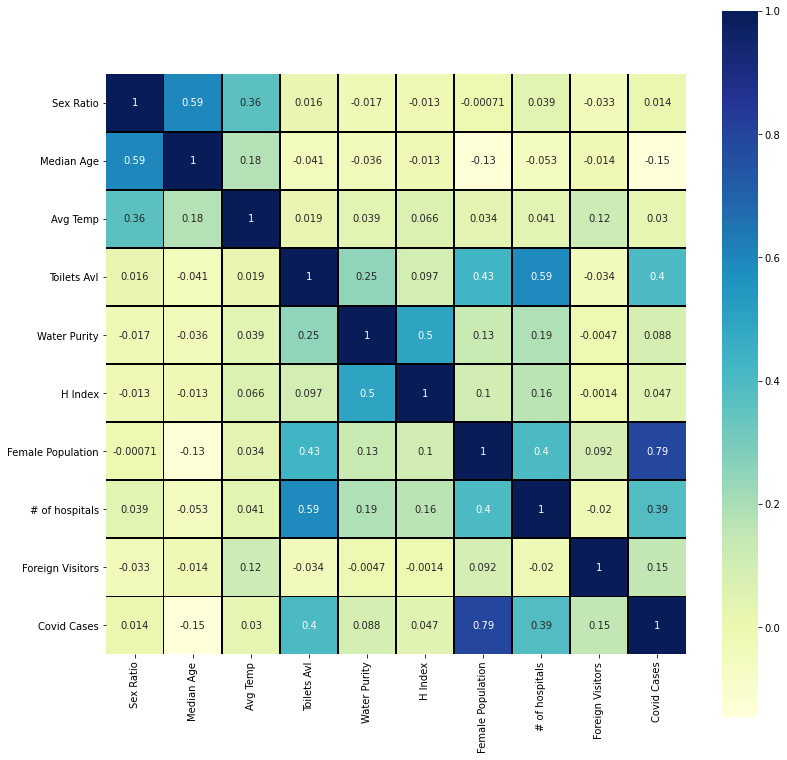

In [10]:
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(trainData.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)
trainData.corr()['Covid Cases'].sort_values(ascending=False)  

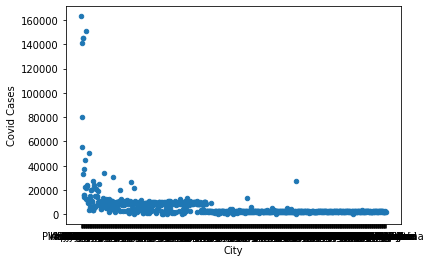

In [11]:
trainData.plot.scatter(x='City', y='Covid Cases')

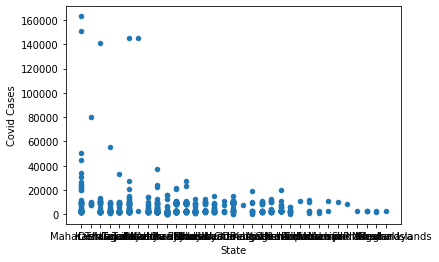

In [12]:
trainData.plot.scatter(x='State', y='Covid Cases')

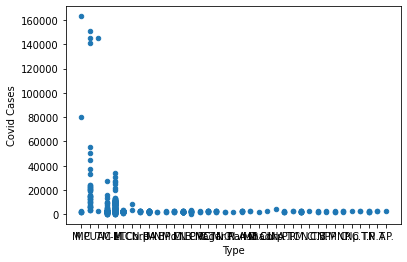

In [13]:
trainData.plot.scatter(x='Type', y='Covid Cases')

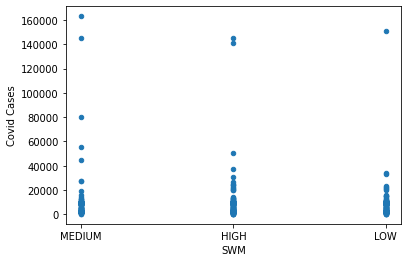

In [14]:
trainData.plot.scatter(x='SWM', y='Covid Cases')

In [15]:
trainData.drop(["Median Age", "City","Sex Ratio","H Index", "Type", "Population [2011]", "Popuation [2001]"], axis = 1, inplace = True)
trainData

,State,Avg Temp,SWM,Toilets Avl,Water Purity,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Maharashtra,32.0,MEDIUM,219.0,150.0,10924403.0,159.0,4408916.0,163115.0
1,Delhi,30.0,MEDIUM,215.0,196.0,9444722.0,148.0,2379169.0,80188.0
2,Karnataka,37.0,HIGH,212.0,102.0,7896728.0,123.0,636502.0,141000.0
3,Telangana,31.0,MEDIUM,217.0,118.0,6333272.0,110.0,126078.0,55123.0
4,Gujarat,25.0,LOW,227.0,109.0,4746138.0,73.0,284973.0,33204.0
...,...,...,...,...,...,...,...,...,...
782,Gujarat,28.0,MEDIUM,68.0,103.0,31263.0,19.0,284973.0,1944.0
783,West Bengal,36.0,MEDIUM,62.0,136.0,34915.0,22.0,1489500.0,2172.0
784,Puducherry,28.0,HIGH,98.0,138.0,37528.0,27.0,106153.0,2851.0
785,Assam,6.0,MEDIUM,63.0,145.0,33125.0,15.0,24720.0,2158.0


In [16]:
data_labeled_encoding = trainData.copy()
data_labeled_encoding['State'] = data_labeled_encoding['State'].astype('category')
data_labeled_encoding['State'] = data_labeled_encoding['State'].cat.codes 
data_labeled_encoding

,State,Avg Temp,SWM,Toilets Avl,Water Purity,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,16,32.0,MEDIUM,219.0,150.0,10924403.0,159.0,4408916.0,163115.0
1,6,30.0,MEDIUM,215.0,196.0,9444722.0,148.0,2379169.0,80188.0
2,13,37.0,HIGH,212.0,102.0,7896728.0,123.0,636502.0,141000.0
3,28,31.0,MEDIUM,217.0,118.0,6333272.0,110.0,126078.0,55123.0
4,8,25.0,LOW,227.0,109.0,4746138.0,73.0,284973.0,33204.0
...,...,...,...,...,...,...,...,...,...
782,8,28.0,MEDIUM,68.0,103.0,31263.0,19.0,284973.0,1944.0
783,32,36.0,MEDIUM,62.0,136.0,34915.0,22.0,1489500.0,2172.0
784,22,28.0,HIGH,98.0,138.0,37528.0,27.0,106153.0,2851.0
785,2,6.0,MEDIUM,63.0,145.0,33125.0,15.0,24720.0,2158.0


In [17]:
data_onehot_encoding = pd.get_dummies(data_labeled_encoding, columns=['SWM'], prefix = ['SWM'])
data_onehot_encoding


,State,Avg Temp,Toilets Avl,Water Purity,Female Population,# of hospitals,Foreign Visitors,Covid Cases,SWM_HIGH,SWM_LOW,SWM_MEDIUM
0,16,32.0,219.0,150.0,10924403.0,159.0,4408916.0,163115.0,0,0,1
1,6,30.0,215.0,196.0,9444722.0,148.0,2379169.0,80188.0,0,0,1
2,13,37.0,212.0,102.0,7896728.0,123.0,636502.0,141000.0,1,0,0
3,28,31.0,217.0,118.0,6333272.0,110.0,126078.0,55123.0,0,0,1
4,8,25.0,227.0,109.0,4746138.0,73.0,284973.0,33204.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
782,8,28.0,68.0,103.0,31263.0,19.0,284973.0,1944.0,0,0,1
783,32,36.0,62.0,136.0,34915.0,22.0,1489500.0,2172.0,0,0,1
784,22,28.0,98.0,138.0,37528.0,27.0,106153.0,2851.0,1,0,0
785,2,6.0,63.0,145.0,33125.0,15.0,24720.0,2158.0,0,0,1


In [178]:
#X_test.fillna(X_test.mean())

In [18]:
from sklearn import preprocessing
#data_after_selection = preprocessing.normalize(data_onehot_encoding)
#print(data_after_selection)
#x = np.delete(data_after_selection, 3, 1)
#y = data_after_selection[:, [3]]
#print(x)
#print(y)


#x=np.delete(data_onehot_encoding, 3, axis=1)
#y=data_onehot_encoding[:, 3]
#X = preprocessing.normalize(x) 


data_selection = data_onehot_encoding.to_numpy()
data_selection = preprocessing.normalize(data_selection)
x = np.delete(data_selection, 3, 1)
y = data_selection[:, 3]
#x = preprocessing.normalize(x)
print(y)

[1.27316425e-05 2.01229860e-05 1.28729476e-05 1.86273633e-05
 2.29241953e-05 2.83467146e-05 2.80118001e-05 5.66567022e-05
 4.42632594e-05 5.44578969e-05 3.11851351e-05 2.78178426e-05
 9.18448419e-05 4.23544196e-05 1.07703353e-04 8.02222349e-05
 4.18520279e-05 6.45934288e-05 1.08927328e-04 4.53107229e-05
 1.26086721e-04 3.38230401e-05 3.69912648e-05 1.01947300e-04
 1.62773567e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.27286013e-04 3.60787106e-05 3.62680332e-05
 6.29974160e-05 1.83235755e-04 1.00134527e-04 3.26168118e-05
 1.19988792e-04 1.00602400e-04 1.49643725e-04 2.49284925e-05
 2.04081755e-04 1.65961830e-04 4.21257842e-05 1.40119045e-04
 1.38363485e-04 3.25684404e-05 5.99415901e-05 3.32748629e-05
 3.84191949e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [23]:
#Splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 20)

In [24]:
# Neural Networks
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(10,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1)
test=model.evaluate(x_test, y_test, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               2816      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 200,449
Trainable params: 200,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 

In [25]:
import sklearn.metrics as metrics
preds = model.predict(x_test)
rmsle=metrics.mean_squared_log_error(y_test, preds)
#rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
rmsle


6.40533532625068e-07

In [27]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 0.044


In [28]:
_, acc = model.evaluate(x_train, y_train, verbose=0)
print('> %.3f' % (acc * 100.0))

> 0.044


In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
0,0.000279,0.000228
1,0.000000,0.000047
2,0.001297,0.001042
3,0.000350,0.000183
4,0.000108,0.001146
5,0.000040,0.000083
6,0.003092,0.001467
7,0.000126,0.001100
8,0.000737,-0.000184
9,0.000000,-0.000718


In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0004200740207084541
Mean Squared Error: 1.065264911297571e-06
Root Mean Squared Error: 0.0010321167139900268
